Import all the required libraries for iris classification

In [1]:
#data manipulations
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#save model
import joblib



Load ALL the Data set required for this classification

In [2]:
#load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# ADD THIS LINE - Create human-readable species names:
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


# Quick Exploration
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df['target'].value_counts())
print(df['species'].value_counts())


(150, 6)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4  

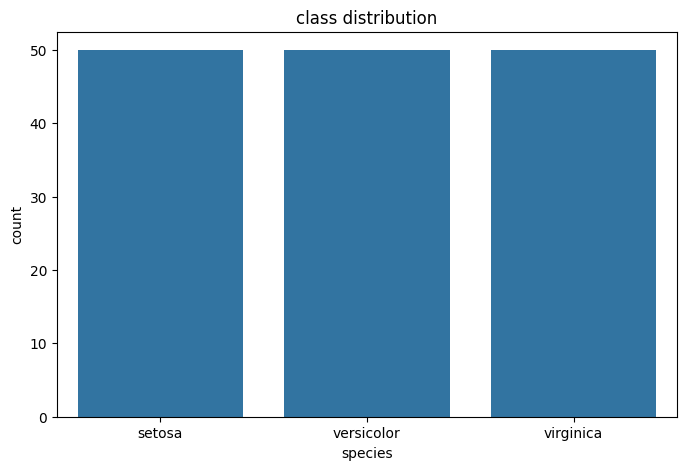

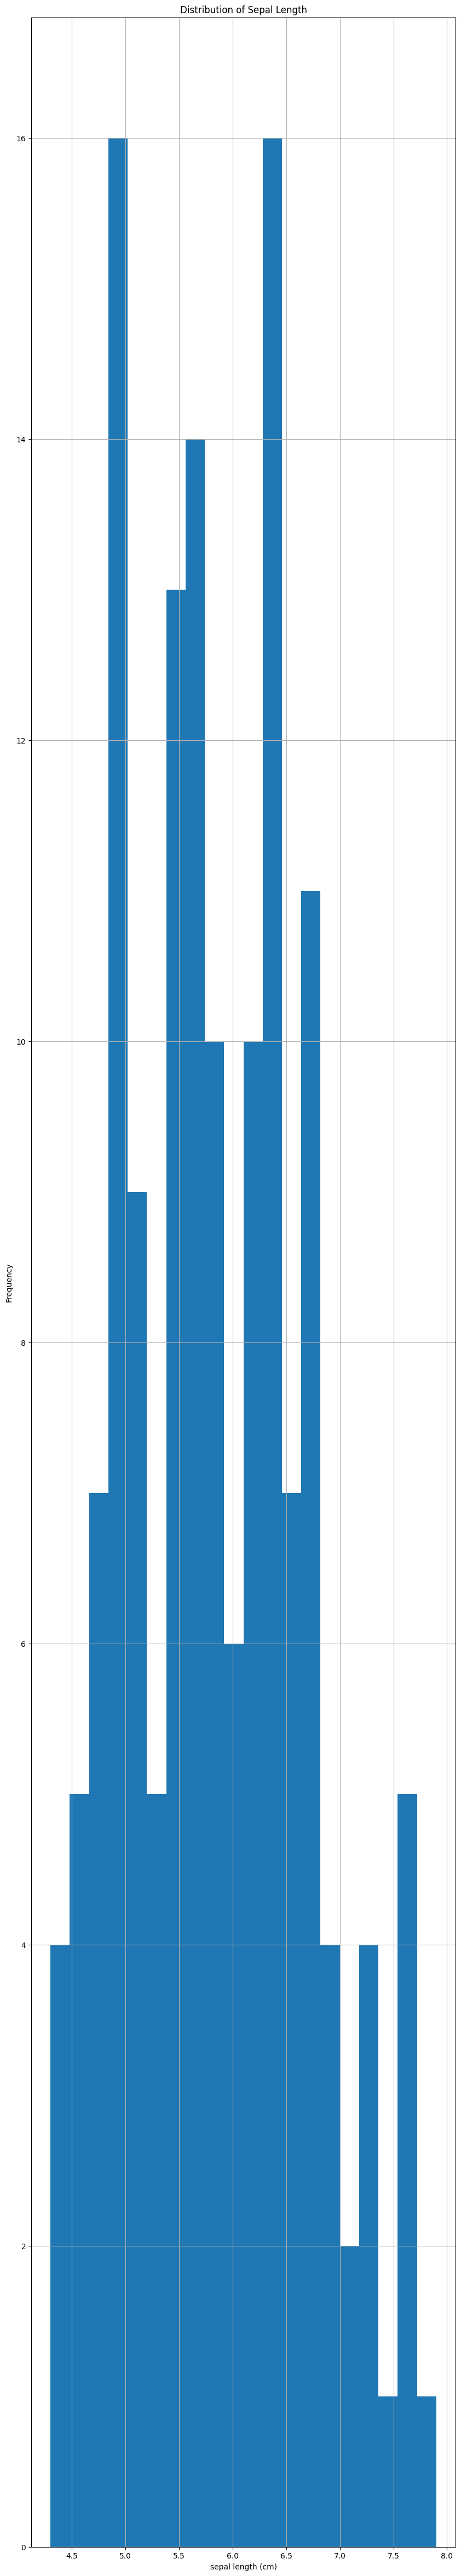

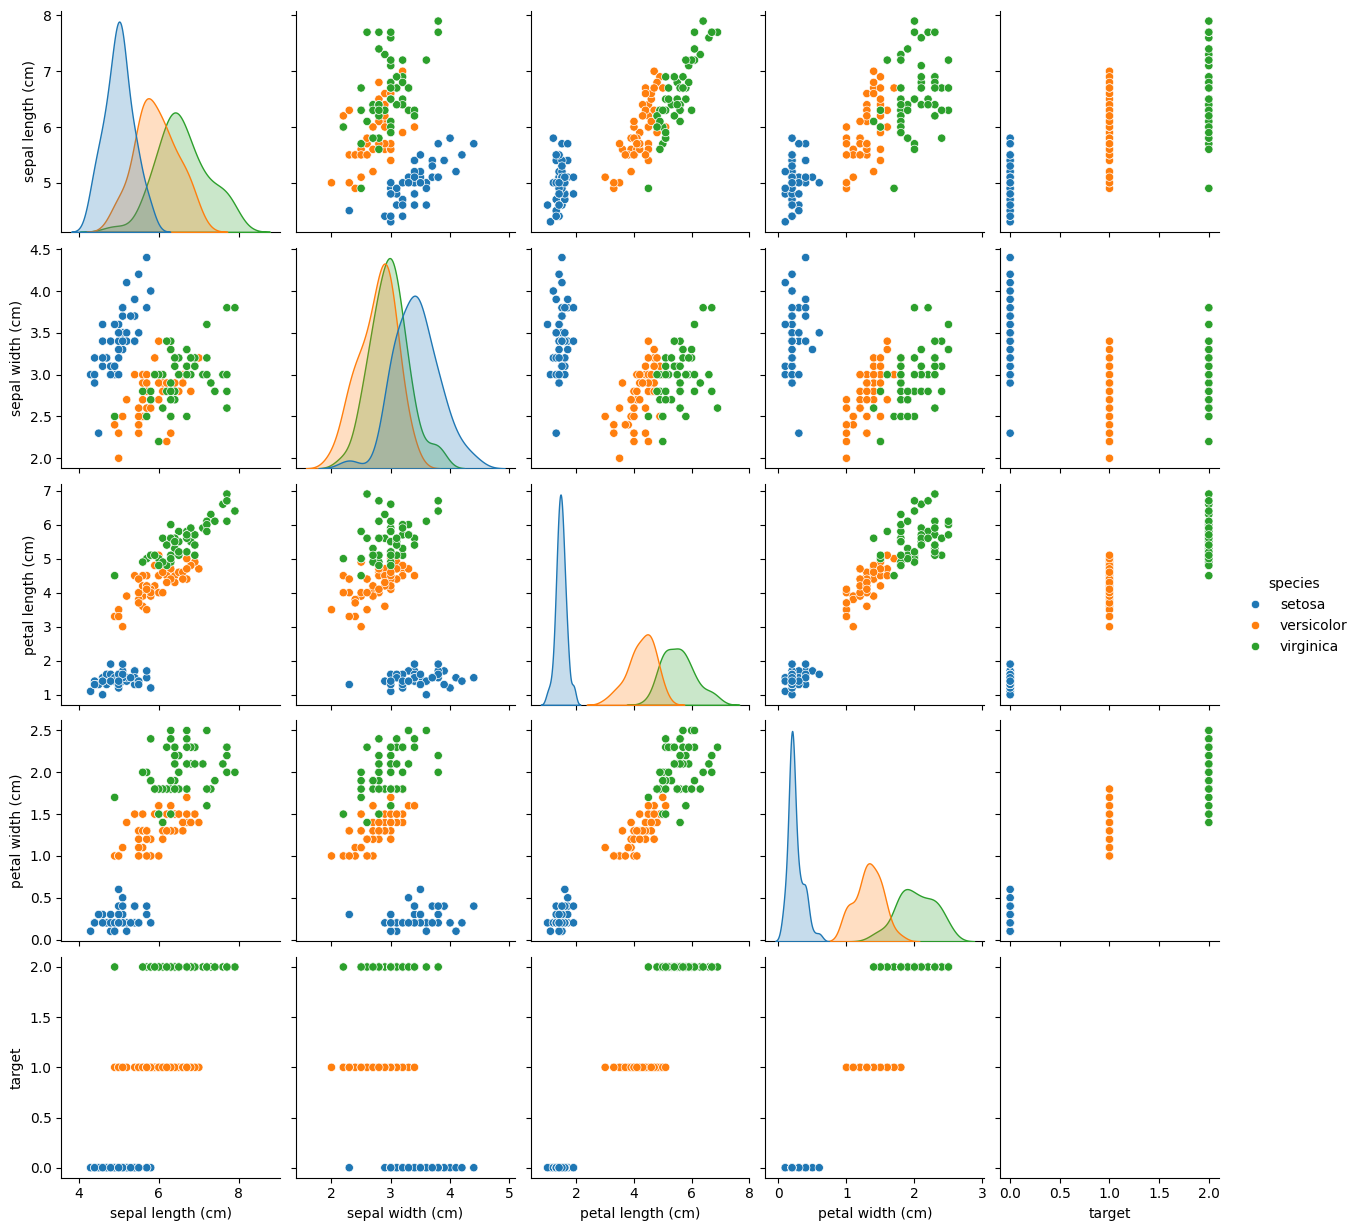

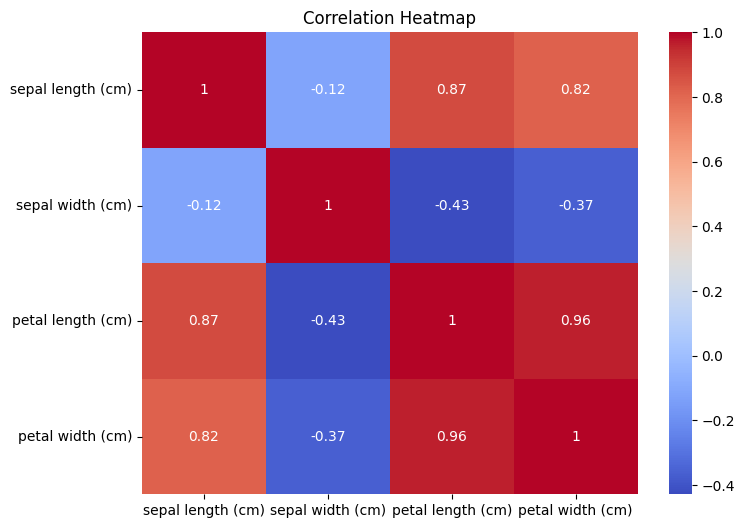

In [5]:
#Count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='species')
plt.title('class distribution')
plt.show()

#histogram
plt.figure(figsize=(10,60))
df['sepal length (cm)'].hist(bins=20)
plt.xlabel('sepal length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')
plt.show()

#pairplot
sns.pairplot(df, hue='species')
plt.show()

#corelation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [6]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0 

In [7]:
#section 4 preprocessing
X = df.drop(['target','species'], axis=1)
Y = df['target']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Note: use X_test_scaled for evaluation/prediction later


Training Samples: 120
Testing Samples: 30


In [8]:
#initialize models

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
#training 
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, Y_train)
    trained_models[name] = model
    print(f" {name} trained successfully.")
    

Training Logistic Regression...
 Logistic Regression trained successfully.
Training Random Forest...
 Random Forest trained successfully.


In [15]:
# Evaluation and save models
for name, model in trained_models.items():
    print('-'*40)
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, y_pred)
    print(f"Accuracy for {name}: {acc:.4f}")
    print(classification_report(Y_test, y_pred))
    print(confusion_matrix(Y_test, y_pred))
    # save model
    joblib.dump(model, f"{name.replace(' ', '_').lower()}_model.joblib")
    print(f"Saved {name} to disk as {name.replace(' ', '_').lower()}_model.joblib")


----------------------------------------
Evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Saved Logistic Regression to disk as logistic_regression_model.joblib
----------------------------------------
Evaluating Random Forest...
Accuracy for Random Forest: 0.9000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0


Logistic Regression
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



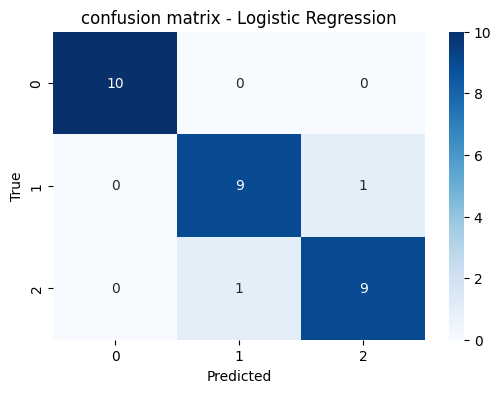


Random Forest
Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



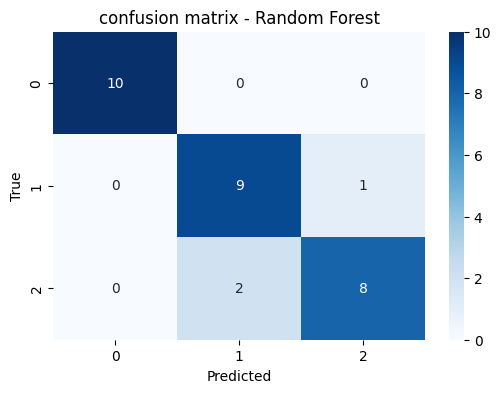


Model Comparison:
                 Model  Accuracy
0  Logistic Regression  0.933333
1        Random Forest  0.900000


In [16]:
#Evaluate Each Model

results = []

for name, model in trained_models.items():
    #predictions
    y_pred = model.predict(X_test_scaled)
    
    #calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    #store results
    results.append({'Model': name, 'Accuracy': accuracy})

    #print report
    print(f"\n{name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))

    #Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'confusion matrix - {name}')
    plt.ylabel(True)
    plt.xlabel('Predicted')
    plt.show()

#compare model
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


In [ ]:
#save model

# save best model
best_model = trained_models['Random Forest']
joblib.dump(best_model, 'iris_model.joblib')
joblib.dump(scaler, 'iris_scaler.joblib')

#load and test 
loaded_model = joblib.load('models/iris_model.joblib')
loaded_scaler = joblib.load('models/iris_scaler.joblib')

# Test Prediction
sample = [[5.1, 3.5, 1.4, 0.2]]  # Example sample
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)
print(f"Predicted class: {prediction[0]}")

Predicted class: 0


c:\Users\gopi\MyProjects\machine-learning-notebooks\ml-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
#quick test


print("="*60)
print("MODEL USAGE TEST")
print("="*60)

# 1. Verify files exist
import os
if os.path.exists('models/iris_model.joblib'):
    print("✅ Model file found!")
else:
    print("❌ Model file not found!")

if os.path.exists('models/iris_scaler.joblib'):
    print("✅ Scaler file found!")
else:
    print("❌ Scaler file not found!")

# 2. Load and test
model = joblib.load('models/iris_model.joblib')
scaler = joblib.load('models/iris_scaler.joblib')

# 3. Test prediction
test_samples = [
    ([5.1, 3.5, 1.4, 0.2], 'setosa'),
    ([6.7, 3.1, 4.7, 1.5], 'versicolor'),
    ([6.3, 2.9, 5.6, 1.8], 'virginica')
]

species_names = ['setosa', 'versicolor', 'virginica']

print("\nTesting predictions:")
for features, expected in test_samples:
    features_array = np.array([features])
    features_scaled = scaler.transform(features_array)
    prediction = model.predict(features_scaled)[0]
    predicted_species = species_names[prediction]
    
    status = "✅" if predicted_species == expected else "❌"
    print(f"{status} Input: {features} → Predicted: {predicted_species} (Expected: {expected})")

print("\n🎉 Model is working perfectly!")

MODEL USAGE TEST
✅ Model file found!
✅ Scaler file found!

Testing predictions:
✅ Input: [5.1, 3.5, 1.4, 0.2] → Predicted: setosa (Expected: setosa)
✅ Input: [6.7, 3.1, 4.7, 1.5] → Predicted: versicolor (Expected: versicolor)
✅ Input: [6.3, 2.9, 5.6, 1.8] → Predicted: virginica (Expected: virginica)

🎉 Model is working perfectly!


c:\Users\gopi\MyProjects\machine-learning-notebooks\ml-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\gopi\MyProjects\machine-learning-notebooks\ml-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\gopi\MyProjects\machine-learning-notebooks\ml-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
